## Compute KL-div

In [50]:
%%bash
spk="wsj"
window=31

post1="post/nnet5c/nnet_proposal_${spk}_eng/monophone.post.matrix"
post2="post/nnet5c/word_tgpr_5k_proposal/${spk}_eng/lat.1.phone.post"
post3="post/nnet5c/ali/proposal_${spk}_eng/ali.1.phone.post"

mapfile="nnet5c_phone_mapping/map_root_int_pseudo_int_no_NSN.map"

python KL_div.py --post-type nnet lat \
                 --input-X $post1 \
                 --input-Y $post2 \
                 --output-kl ./kl_${spk}_eng_nnet_vs_word_avrg_${window}_new.txt \
                 --map-phone-to-pdf $mapfile \
                 --filt-type "square" \
                 --filt-win-len $window \
                 --context-win-len 0 \
                 --threshold 2
#python KL_div.py $post1 $post3 ./kl_${spk}_eng_nnet_vs_ali_avrg_${window}_new.txt $mapfile "square" $window 0 2
#python KL_div.py $post2 $post3 ./kl_${spk}_eng_word_vs_ali_avrg_${window}_new.txt $mapfile "square" $window 0 2

In [12]:
# %%bash
spk="wsj"
window=31

post1 = 'post/nnet5c/nnet_proposal_wsj_eng/monophone.post.matrix'
post2 = 'post/nnet5c/word_tgpr_5k_proposal/wsj_eng/lat.1.phone.post'
post3 = 'post/nnet5c/ali/proposal_wsj_eng/ali.1.phone.post'

mapfile = 'nnet5c_phone_mapping/map_root_int_pseudo_int_no_NSN.map'

python KL_div.py ${post1} ${post2} ./kl_${spk}_eng_nnet_vs_word_avrg_31_new.txt $mapfile 'square' 31 0 2
python KL_div.py ${post1} ${post3} ./kl_${spk}_eng_nnet_vs_ali_avrg_31_new.txt $mapfile 'square' 31 0 2
python KL_div.py ${post2} ${post3} ./kl_${spk}_eng_word_vs_ali_avrg_31_new.txt $mapfile 'square' 31 0 2

SyntaxError: invalid syntax (<ipython-input-12-a210c8fc054d>, line 11)

## Plot posts and KL-div

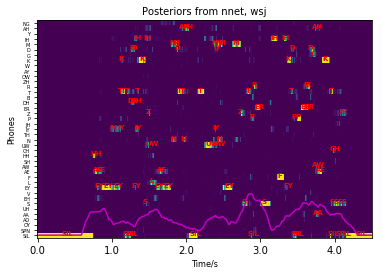

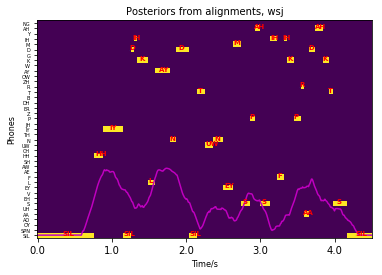

In [3]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from tools.read_files import read_kaldi_post
from tools.read_files import read_kl
from tools.plot_figures import plot_post


post1 = 'post/nnet5c/nnet_proposal_yjy_eng/monophone.post.matrix'
#post2 = 'post/nnet5c/word_tgpr_5k_proposal/yjy_eng/lat.1.phone.post'
post2 = 'post/nnet5c/ali/proposal_yjy_eng/ali.1.phone.post'
phone_to_pdf = 'nnet5c_phone_mapping/map_root_int_pseudo_int_no_NSN.map'

#kl_file_1 = 'kl_yjy_eng_nnet_vs_ali_avrg_31.txt'
#kl_file_2 = 'kl_yjy_eng_nnet_vs_ali_avrg_31.txt'
#kl_file_2 = 'wsj_eng_word_vs_nnet.txt'
#kl_file_3 = 'yjy_eng_ali_vs_word.txt'

CLASSES_ARPABET = ['SIL','SPN','OY', 'AO', 'AA', 'UH', 'S', 'EH', 'V', 'EY', 'L', 'F', 'AE', 'AW', 'SH', 'HH', 'CH', 'UW', 'N', 'TH','IY','JH', 'P', 'Z', 'ER', 'DH', 'B', 'T', 'R', 'ZH', 'OW', 'AY', 'W', 'K', 'G', 'D', 'M', 'IH', 'Y', 'AH', 'NG']
#CLASSES_ARPABET.reverse()

img_file_1 = 'yjy_eng_nnet_post_vs_ali.eps'
img_file_2 = 'yjy_eng_ali_post_vs_nnet.eps'
#img_file_3 = 'yjy_eng_ali_vs_word.eps'

utt1 = read_kaldi_post.readKaldiNnetPhonePost(post1, merge_NSN = 'True', merge_SPN = None, add_epsilon = 'True')
utt2 = read_kaldi_post.readKaldiLatPhonePost(post2, phone_to_pdf, add_epsilon = 'True')
#utt3 = read_kaldi_post.readKaldiLatPhonePost(post3, phone_to_pdf, add_epsilon = 'True') 

#utt2 = read_kaldi_post.readKaldiPost(post2, len(CLASSES_ARPABET))
#utt3 = read_kaldi_post.readKaldiPost(post3, len(CLASSES_ARPABET))


spk = 'yjy'
#kl_file_1 = 'kl_' + spk + '_eng_nnet_vs_ali_avrg_31.txt'
#kl_file_2 = 'kl_' + spk + '_eng_nnet_vs_word_avrg_31.txt'
kl_file_1 = 'kl_' + spk + '_eng_nnet_vs_word_avrg_31.txt'
kl_file_2 = 'kl_' + spk + '_eng_nnet_vs_ali_avrg_31.txt'

#kl_file_2 = 'kl_' + spk + '_eng_word_vs_ali_avrg_31.txt'



(utt_kl, kl_1) = read_kl.read_kl(kl_file_1)
(utt_kl, kl_2) = read_kl.read_kl(kl_file_2)
#(utt_kl, kl_3) = read_kl.read_kl(kl_file_3)

for key in utt1.keys():
    m1 = np.transpose(utt1[key]) # nnet
    m2 = np.transpose(utt2[key]) # word
   # m3 = np.transpose(utt3[key]) # align



    #fig1 = plt.figure()
    #ax1 = fig1.add_subplot(211)
    plot_post.plotfigure('Posteriors from nnet, wsj', m1, CLASSES_ARPABET)
    plt.plot(kl_1, 'm', ms = 6)
    plt.gca().invert_yaxis()
    #plt.set_ylim((0, 20))
    
   # ax2 = fig1.add_subplot(212)
    plot_post.plotfigure('Posteriors from alignments, wsj', m2, CLASSES_ARPABET)
    plt.plot(kl_2, 'm', ms = 6)
    plt.gca().invert_yaxis()
    #plt.set_ylim((0, 20))
    
    
plt.show()

## Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tools.read_files import read_kl

spk = 'yjy'
kl_file_1 = 'kl_' + spk + '_eng_nnet_vs_ali_avrg_31.txt'
#kl_file_2 = 'kl_' + spk + '_eng_nnet_vs_word_avrg_31.txt'
#kl_file_2 = 'kl_' + spk + '_eng_nnet_vs_word_avrg_31_new.txt'
#kl_file_3 = 'kl_' + spk + '_eng_word_vs_ali_avrg_31.txt'
figure_name = spk + '_kl_no_filt_avrg_31.eps'

(utt, kl_1) = read_kl.read_kl(kl_file_1)
#(utt, kl_2) = read_kl.read_kl(kl_file_2)
#(utt, kl_3) = read_kl.read_kl(kl_file_3)


fig = plt.figure()
#fig.suptitle("Title for whole figure", fontsize=16)
ax1 = fig.add_subplot(111)
ax1.set_title(spk + ': ali_vs_nnet')
t1 = np.arange(0, len(kl_1)/100, 0.01)
ax1.plot(t1, kl_1)
ax1.set_ylim((0, 20))

#ax2 = fig.add_subplot(312)
#ax2.set_title(spk + ': word_vs_nnet')
#ax2.plot(kl_2)
#ax2.set_ylim((0, 50))


#ax3 = fig.add_subplot(313)
#ax3.set_title(spk + ': ali_vs_word')
#ax3.plot(kl_3)
#ax3.set_ylim((0, 50))

fig.tight_layout()
plt.savefig(figure_name)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tools.read_files import read_kaldi_post
from tools.read_files import read_kaldi_post_readin_matrix

from tools.plot_figures import plot_post

mapfile = 'nnet5c_phone_mapping/map_root_int_pseudo_int_no_NSN.map'
#postfile = 'post/nnet5c/word_tgpr_5k_proposal/yjy_eng/lat.1.phone.post'
#post2 = 'post/nnet5c/word_tgpr_5k_proposal/yjy_eng/lat.1.phone.post.matrix'
postfile = 'post/nnet5c/nnet_proposal_wsj_eng/monophone.post.matrix'
post2 = 'post/nnet5c/nnet_proposal_wsj_eng/monophone.post.kd.matrix'

CLASSES_ARPABET = ['SIL','SPN','OY', 'AO', 'AA', 'UH', 'S', 'EH', 'V', 'EY', 'L', 'F', 'AE', 'AW', 'SH', 'HH', 'CH', 'UW', 'N', 'TH','IY','JH', 'P', 'Z', 'ER', 'DH', 'B', 'T', 'R', 'ZH', 'OW', 'AY', 'W', 'K', 'G', 'D', 'M', 'IH', 'Y', 'AH', 'NG']

uttdict = read_kaldi_post.readKaldiNnetPhonePost(postfile, merge_NSN = 'True', merge_SPN = None, add_epsilon = 'True')
utt2 = read_kaldi_post_readin_matrix.readKaldiPost(post2, len(CLASSES_ARPABET))
for key in utt2.keys():
    m = np.transpose(uttdict[key]) 
    m2 = np.transpose(utt2[key]) # word
    
    if m.all() == m2.all():
        print ('equal')
    plot_post.plotfigure('Posteriors from word, wsj', m, CLASSES_ARPABET)
    plot_post.plotfigure('Posteriors from word, wsj 2', m2, CLASSES_ARPABET)
plt.show()



### Plot WER under lm-scales

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lm = np.array([ 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
wer = np.array([ 4.84, 4.15, 3.96, 3.77, 3.81, 3.66, 3.55, 3.64, 3.92, 3.98, 4.04])

plt.scatter(lm, wer)
plt.ylabel('wer(%)')
plt.xlabel('lm scale')
plt.title('WER with different lm scale')
plt.savefig('wer_lm.eps')
plt.show()



$$p(ac)^{(1/\gamma)} * p(lm)$$

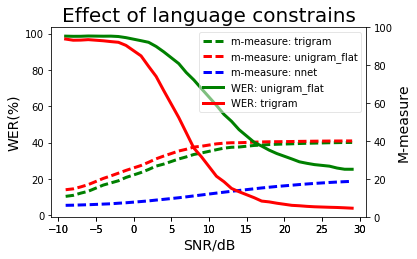

In [2]:
import numpy as np
#from bokeh.plotting import figure, output_file, show
from tools.read_files import read_kl
import matplotlib.pyplot as plt

#kl_file = 'kl_wsj_eng_nnet_vs_word_avrg_31_new.txt'
#kl = read_kl.read_kl(kl_file)
#print (kl['440c02140'].shape)
ug_file = 'm-measure/nnet5c/test_eval92_ugpr_5k_flat_noise_babble/snr-m.txt'
tg_file = 'm-measure/nnet5c/test_eval92_word_tgpr_5k_noise/babble/snr-m.txt'
nnet_file = 'm-measure/nnet5c/test_eval92_nnet_noise_babble/snr-m.txt'
ug_wer_file = 'wer_ug.list'
tg_wer_file = 'wer_tg.list'

pic = 'results/m-measure.eps'
ug_m = read_kl.read_kl(ug_file)
tg_m = read_kl.read_kl(tg_file)
nnet_m = read_kl.read_kl(nnet_file)
ug_wer = read_kl.read_kl(ug_wer_file)
tg_wer = read_kl.read_kl(tg_wer_file)

key = np.zeros(0)
u_m = np.zeros(0)
t_m = np.zeros(0)
n_m = np.zeros(0)
u_w = np.zeros(0)
t_w = np.zeros(0)

for k in ug_m.keys():
    #print (float(k))
    key = np.hstack((key, float(k)))
    
    u_m = np.hstack((u_m, ug_m[k]))
    t_m = np.hstack((t_m, tg_m[k]))
    n_m = np.hstack((n_m, nnet_m[k]))
    
    u_w = np.hstack((u_w, ug_wer[k]))
    t_w = np.hstack((t_w, tg_wer[k]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)

plt.title('Effect of language constrains', fontsize=20)
l1, = ax1.plot(key, u_m, 'g--', linewidth=3.0, label = 'm-measure: trigram')
l2, = ax1.plot(key, t_m, 'r--', linewidth=3.0, label ='m-measure: unigram_flat')
l3, = ax1.plot(key, n_m, 'b--', linewidth = 3.0, label = 'm-measure: nnet')
ax1.set_xlabel('SNR/dB', fontsize=14)
ax1.set_ylim(0, 100)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel('M-measure', fontsize=14)

l4, = ax2.plot(key, u_w, 'g', linewidth=3.0, label = 'WER: unigram_flat')
l5, = ax2.plot(key, t_w, 'r', linewidth=3.0, label = 'WER: trigram')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("WER(%)", fontsize = 14)

leg = plt.legend((l1, l2, l3, l4, l5),\
           ('m-measure: trigram', 'm-measure: unigram_flat', 'm-measure: nnet', 'WER: unigram_flat', 'WER: trigram'),\
             loc = 1)
leg.get_frame().set_alpha(0.5)

fig.set_rasterized(True)
plt.tight_layout()
fig.savefig(pic, rasterized=True,dpi=200)
plt.show()

In [6]:
import numpy as np
a = np.zeros(3)
b = np.ones(3)
c = np.hstack((a, b))
print (c)

[ 0.  0.  0.  1.  1.  1.]


In [24]:
%%bash

tg_postdir='exp/nnet5c/decode_tgpr_5k_eval92_noise_babble_snr'
ug_postdir='exp/nnet5c/decode_word_ugpr_5k_flat_eval92_noise_babble_snr'

. path.sh

rm -f wer*.list
while read s
do
    paste -d " " <(echo $s) <(cat ${tg_postdir}_${s}/wer_* | best_wer.sh | cut -d ' ' -f2) | sort -k1 -n >> wer_tg.list
    paste -d " " <(echo $s) <(cat ${ug_postdir}_${s}/wer_* | best_wer.sh | cut -d ' ' -f2) | sort -k1 -n >> wer_ug.list
done < snr_utgpr_5k_flat.list

In [66]:
%%bash
spk="wsj"
window=31


post_tg="post/nnet5c/word_tgpr_5k_noise_babble/snr"
post_ug="post/nnet5c/word_ugpr_5k_flat_noise_babble/snr"
post_ali="post/nnet5c/ali/test_eval92_clean/"
mapfile="nnet5c_phone_mapping/map_root_int_pseudo_int_no_NSN.map"

. cmd.sh
while read s
do
ug=${post_ug}_${s}
tg=${post_tg}_${s}
cat $ug/lat.*.phone.post > $ug/lat_phone.post
cat $tg/lat.*.phone.post > $tg/lat_phone.post


python KL_div.py --post-type lat lat \
                 --input-X $ug/lat.$nj.post \
                 --input-Y $post_ali/ali.$nj.post \
                 --output-kl results/kl_eval92_ug_vs_ali_avrg_${window}_new.$nj.txt \
                 --map-phone-to-pdf $mapfile \
                 --filt-type "square" \
                 --filt-win-len $window \
                 --context-win-len 0 \
                 --threshold 2
                 
python KL_div.py --post-type lat lat \
                 --input-X $tg/lat.$nj.post \
                 --input-Y $post_ali/ali.$nj.post \
                 --output-kl results/kl_eval92_tg_vs_ali_avrg_${window}_new.$nj.txt \
                 --map-phone-to-pdf $mapfile \
                 --filt-type "square" \
                 --filt-win-len $window \
                 --context-win-len 0 \
                 --threshold 2
                 
done < snr_utgpr_5k_flat.list

Process is terminated.
